# ✅ 1: Grayscale Conversion and Visualization

🔹 CHUNK 1: Load a Real RGB Image and Convert to Grayscale
Goal: Understand how OpenCV converts color images to grayscale using perceptual weights.


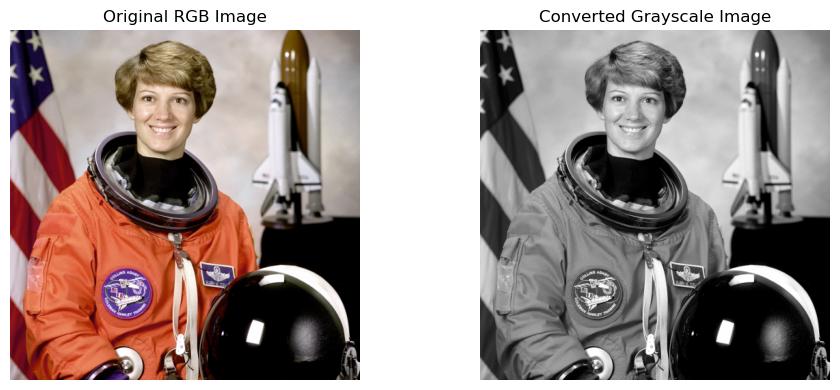

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

print("🔹 CHUNK 1: Load a Real RGB Image and Convert to Grayscale")
print("Goal: Understand how OpenCV converts color images to grayscale using perceptual weights.")

# Load a real RGB image using skimage
color_img = data.astronaut()  # RGB format
color_img_bgr = cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR)  # Convert to BGR for OpenCV

# Convert to grayscale using OpenCV
gray_img = cv2.cvtColor(color_img_bgr, cv2.COLOR_BGR2GRAY)

# Visualize both
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(color_img)
plt.title("Original RGB Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title("Converted Grayscale Image")
plt.axis('off')

plt.tight_layout()
plt.show()


# ✅ 2: Image Resizing (Shrink and Expand)

🔹 CHUNK 2: Resize the Image (Shrink and Expand)
Goal: Visualize the effect of downsampling and upsampling using OpenCV.


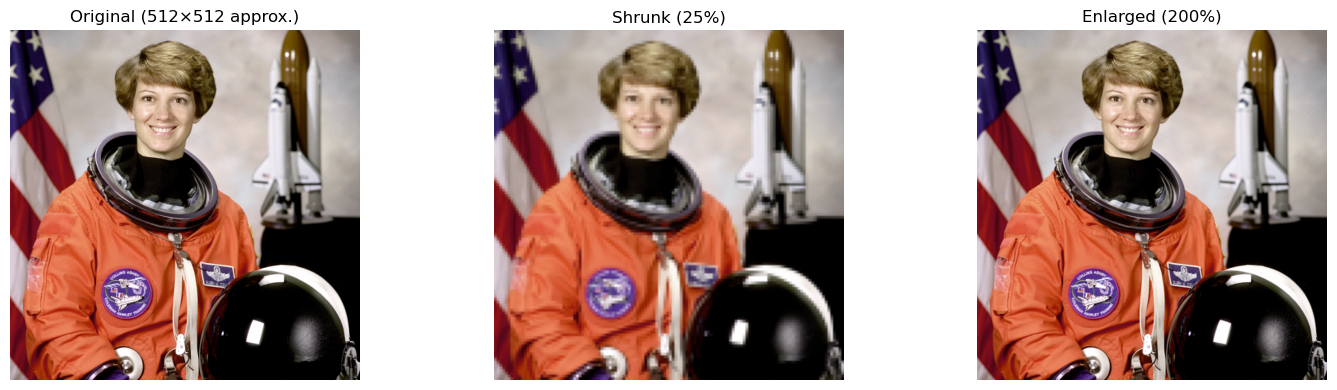

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

print("🔹 CHUNK 2: Resize the Image (Shrink and Expand)")
print("Goal: Visualize the effect of downsampling and upsampling using OpenCV.")

# Load color image
color_img = data.astronaut()  # RGB format
color_img_bgr = cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR)

# Shrink to 25% of original size
small_img = cv2.resize(color_img_bgr, (0, 0), fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)

# Enlarge to 2x original size
large_img = cv2.resize(color_img_bgr, (0, 0), fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)

# Convert back to RGB for visualization
small_img_rgb = cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB)
large_img_rgb = cv2.cvtColor(large_img, cv2.COLOR_BGR2RGB)

# Display original, shrunk, and enlarged images
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(color_img)
plt.title("Original (512×512 approx.)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(small_img_rgb)
plt.title("Shrunk (25%)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(large_img_rgb)
plt.title("Enlarged (200%)")
plt.axis('off')

plt.tight_layout()
plt.show()


# ✅ 3: Pixel Normalization

🔹 CHUNK 3: Pixel Value Normalization
Goal: Normalize pixel intensities from [0, 255] to [0, 1] for neural network compatibility.


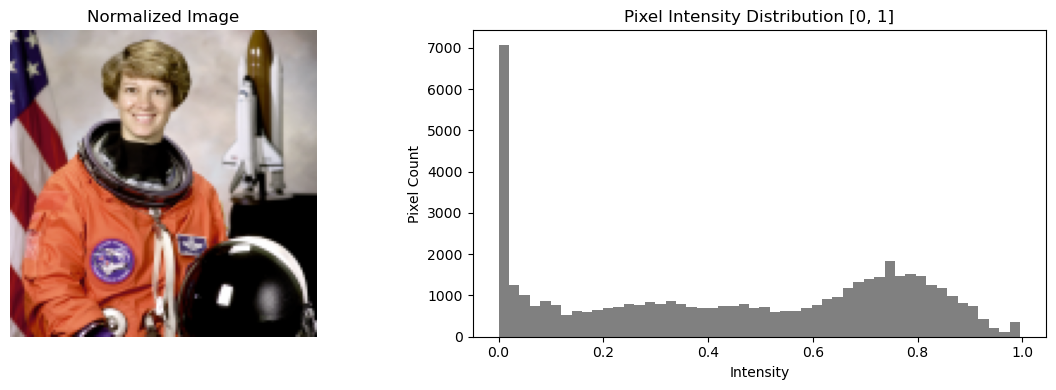

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

print("🔹 CHUNK 3: Pixel Value Normalization")
print("Goal: Normalize pixel intensities from [0, 255] to [0, 1] for neural network compatibility.")

# Load and shrink the image again to keep things compact
color_img = data.astronaut()  # RGB format
color_img_bgr = cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR)
small_img = cv2.resize(color_img_bgr, (0, 0), fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)

# Convert BGR to RGB for display and float32 for precision
small_img_rgb = cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB)
small_img_rgb_float = small_img_rgb.astype(np.float32)

# Normalize the pixel values
norm_img = small_img_rgb_float / 255.0

# Display image and histogram
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(norm_img)
plt.title("Normalized Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(norm_img.ravel(), bins=50, color='gray')
plt.title("Pixel Intensity Distribution [0, 1]")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")

plt.tight_layout()
plt.show()


# ✅ 4: Sobel Edge Detection + Gradient Visualization

🔹 CHUNK 4: Sobel Edge Detection
Goal: Detect horizontal and vertical gradients using Sobel filters and visualize the edge magnitude.


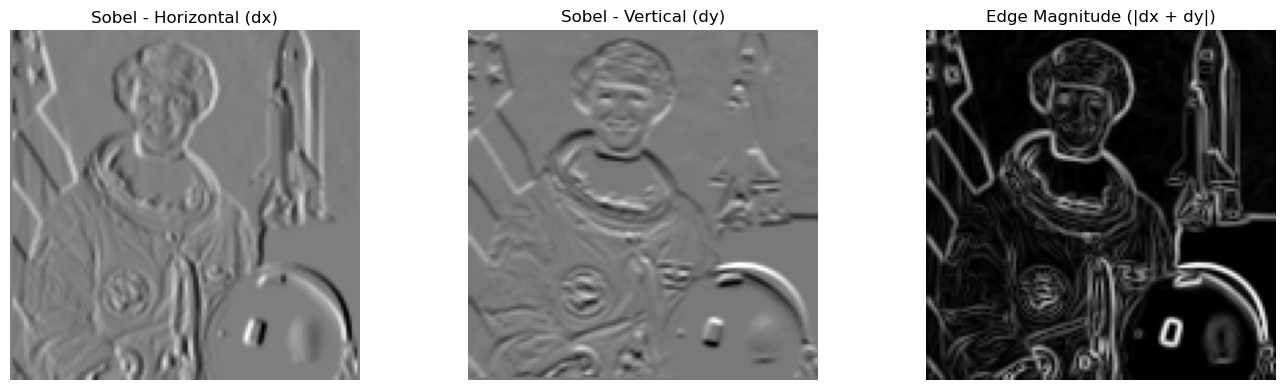

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

print("🔹 CHUNK 4: Sobel Edge Detection")
print("Goal: Detect horizontal and vertical gradients using Sobel filters and visualize the edge magnitude.")

# Load real RGB image and convert to grayscale
color_img = data.astronaut()
gray_img = cv2.cvtColor(cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2GRAY)

# Resize to make computation and display cleaner
gray_small = cv2.resize(gray_img, (128, 128), interpolation=cv2.INTER_AREA)

# Apply Sobel filters
sobel_x = cv2.Sobel(gray_small, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(gray_small, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges

# Compute edge magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(255 * sobel_magnitude / np.max(sobel_magnitude))  # Normalize to 0–255

# Display results
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel - Horizontal (dx)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel - Vertical (dy)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title("Edge Magnitude (|dx + dy|)")
plt.axis('off')

plt.tight_layout()
plt.show()


# ✅ 5: Canny Edge Detection with Threshold Control

🔹 CHUNK 5: Canny Edge Detection
Goal: Apply Canny edge detection and understand how threshold values affect the output.


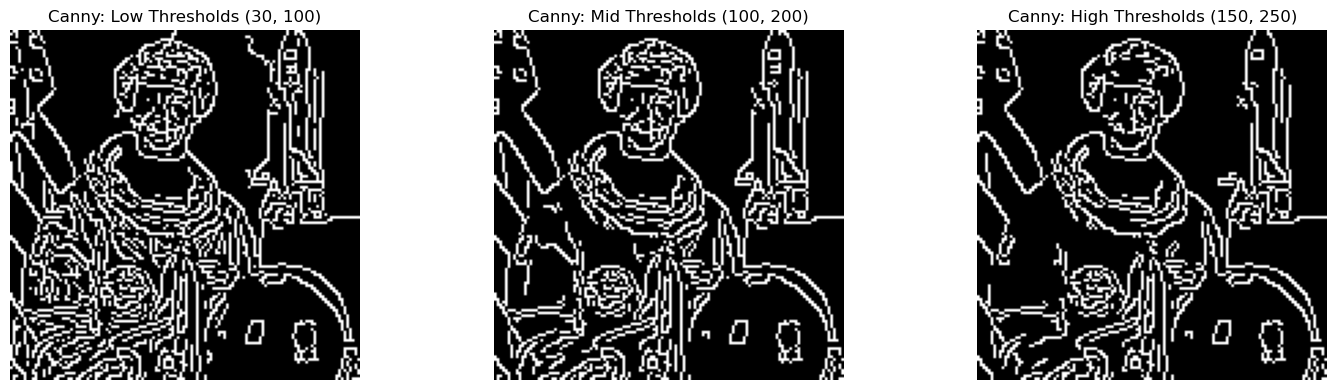

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

print("🔹 CHUNK 5: Canny Edge Detection")
print("Goal: Apply Canny edge detection and understand how threshold values affect the output.")

# Load and prepare grayscale image
color_img = data.astronaut()
gray_img = cv2.cvtColor(cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2GRAY)
gray_small = cv2.resize(gray_img, (128, 128), interpolation=cv2.INTER_AREA)

# Apply Canny edge detection with varying thresholds
edges_low = cv2.Canny(gray_small, threshold1=30, threshold2=100)
edges_mid = cv2.Canny(gray_small, threshold1=100, threshold2=200)
edges_high = cv2.Canny(gray_small, threshold1=150, threshold2=250)

# Display edge maps
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(edges_low, cmap='gray')
plt.title("Canny: Low Thresholds (30, 100)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges_mid, cmap='gray')
plt.title("Canny: Mid Thresholds (100, 200)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges_high, cmap='gray')
plt.title("Canny: High Thresholds (150, 250)")
plt.axis('off')

plt.tight_layout()
plt.show()


# ✅ 6: Harris Corner Detection and Visualization

🔹 6: Harris Corner Detection
Goal: Detect corners using the Harris method and visualize them on the image.


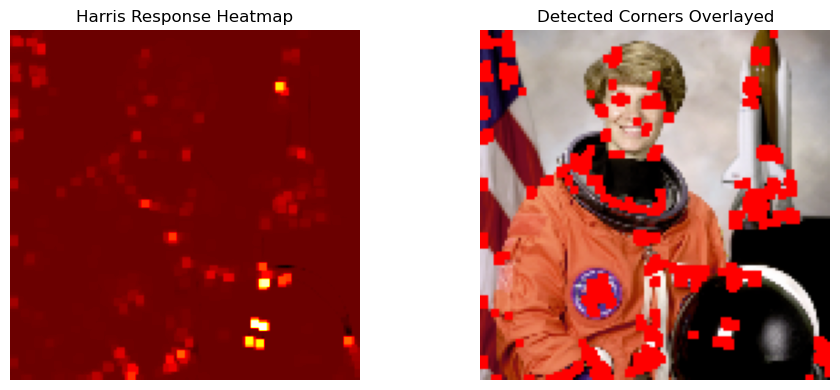

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

print("🔹 6: Harris Corner Detection")
print("Goal: Detect corners using the Harris method and visualize them on the image.")

# Load and convert to grayscale
color_img = data.astronaut()
gray_img = cv2.cvtColor(cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2GRAY)
gray_small = cv2.resize(gray_img, (128, 128), interpolation=cv2.INTER_AREA)

# Convert to float32 for Harris
gray_float = np.float32(gray_small)

# Apply Harris corner detection
harris_response = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Dilate for better visualization
harris_dilated = cv2.dilate(harris_response, None)

# Threshold and mark corners on a color image
threshold = 0.01 * harris_dilated.max()
corner_map = color_img.copy()
corner_map_resized = cv2.resize(corner_map, (128, 128))

corner_map_resized[harris_dilated > threshold] = [255, 0, 0]  # Mark corners in red

# Display corner response heatmap and annotated image
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(harris_dilated, cmap='hot')
plt.title("Harris Response Heatmap")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(corner_map_resized)
plt.title("Detected Corners Overlayed")
plt.axis('off')

plt.tight_layout()
plt.show()

# ✅ 7: Data Augmentation (Rotation, Zoom, Shift) using ImageDataGenerator

🔹 7: Data Augmentation with ImageDataGenerator
Goal: Apply random rotation, zoom, and shift to simulate training variability.


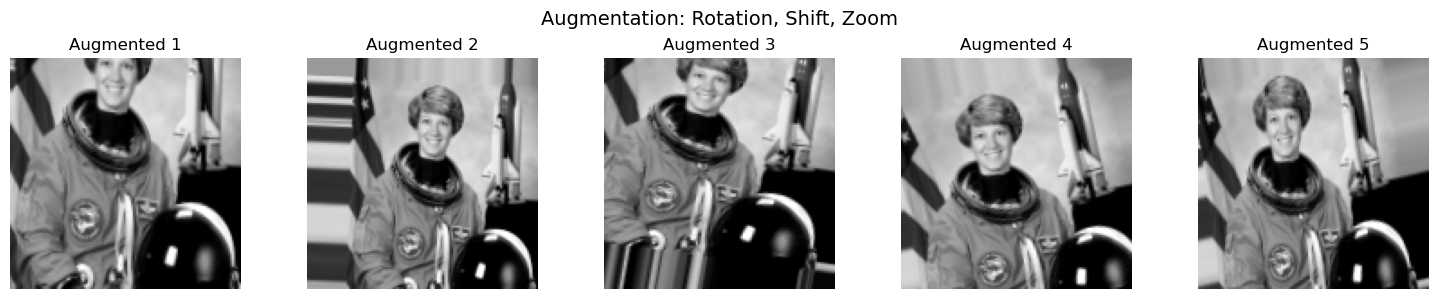

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("🔹 7: Data Augmentation with ImageDataGenerator")
print("Goal: Apply random rotation, zoom, and shift to simulate training variability.")

# Load grayscale image and resize
color_img = data.astronaut()
gray_img = cv2.cvtColor(cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2GRAY)
gray_small = cv2.resize(gray_img, (128, 128), interpolation=cv2.INTER_AREA)

# Normalize and reshape for ImageDataGenerator
gray_small = gray_small / 255.0
gray_small = np.expand_dims(gray_small, axis=(0, -1))  # Shape: (1, 128, 128, 1)

# Define augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.2
)

# Generate augmented images
aug_iter = datagen.flow(gray_small, batch_size=1)

# Display multiple augmented outputs
plt.figure(figsize=(15, 3))
for i in range(5):
    batch = next(aug_iter)[0].squeeze()  # Shape: (128, 128)
    plt.subplot(1, 5, i+1)
    plt.imshow(batch, cmap='gray')
    plt.title(f"Augmented {i+1}")
    plt.axis('off')

plt.suptitle("Augmentation: Rotation, Shift, Zoom", fontsize=14)
plt.tight_layout()
plt.show()


# ✅ 8: Final Integration – CNN-ready Preprocessing Pipeline Summary?

🔹 8: Full CNN Input Preprocessing
Goal: Prepare a color image for CNN input — grayscale conversion, resizing, normalization, reshaping.
Final preprocessed image shape for CNN: (1, 32, 32, 1)


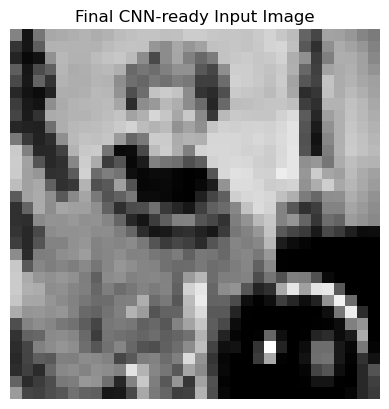

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

print("🔹 8: Full CNN Input Preprocessing")
print("Goal: Prepare a color image for CNN input — grayscale conversion, resizing, normalization, reshaping.")

# Step 1: Load and convert to grayscale
color_img = data.astronaut()
gray_img = cv2.cvtColor(cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2GRAY)

# Step 2: Resize to model input size (e.g., 32x32)
target_size = (32, 32)
resized_img = cv2.resize(gray_img, target_size, interpolation=cv2.INTER_AREA)

# Step 3: Normalize pixel values
normalized_img = resized_img / 255.0

# Step 4: Reshape to CNN-compatible format (Batch, Height, Width, Channels)
cnn_input = np.expand_dims(normalized_img, axis=(0, -1))  # Shape: (1, 32, 32, 1)

# Print final shape
print("Final preprocessed image shape for CNN:", cnn_input.shape)

# Display processed image
plt.title("Final CNN-ready Input Image")
plt.imshow(normalized_img, cmap='gray')
plt.axis('off')
plt.show()
